In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


In [4]:
data_df = pd.read_csv('/content/cardio_train.csv',delimiter=';')
data_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data_df = data_df.drop(['id'],axis=1)
data_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
print(data_df.columns)
print(data_df.info())
data_df.age = data_df.age//365
data_df.describe()

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.4 MB
None


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


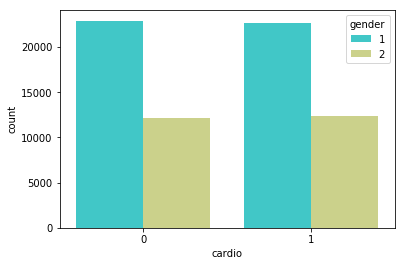

In [8]:
sns.countplot(x='cardio',data=data_df,hue='gender',palette='rainbow')


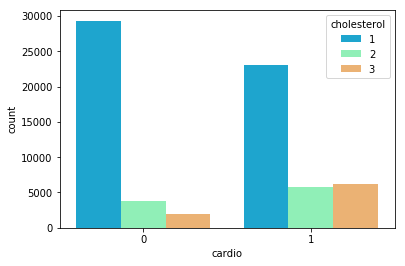

In [9]:
sns.countplot(x='cardio',data=data_df,hue='cholesterol',palette='rainbow')


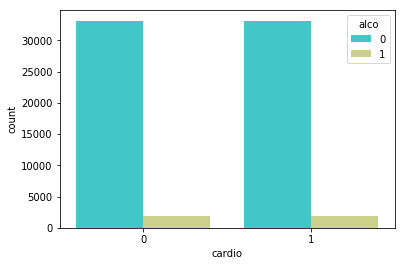

In [10]:
sns.countplot(x='cardio',data=data_df,hue='alco',palette='rainbow')


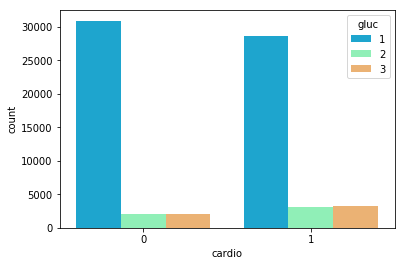

In [11]:
sns.countplot(x='cardio',data=data_df,hue='gluc',palette='rainbow')

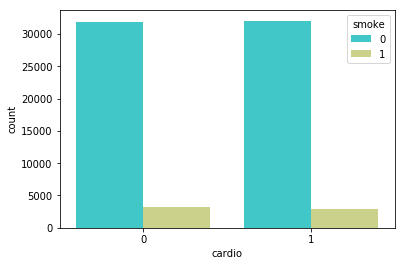

In [13]:
sns.countplot(x='cardio',data=data_df,hue='smoke',palette='rainbow')

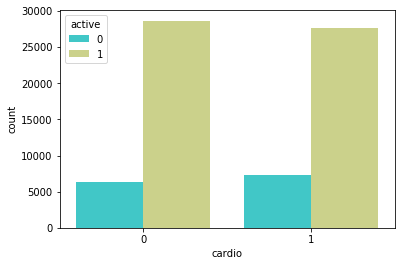

In [13]:
sns.countplot(x='cardio',data=data_df,hue='active',palette='rainbow')

In [14]:
correlations = data_df.corr()['cardio'].drop('cardio')
print(correlations)

age            0.237985
gender         0.008109
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
Name: cardio, dtype: float64


In [15]:
data_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [0]:
X = data_df.iloc[:,0:11]
y = data_df.iloc[:,11]

In [17]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [18]:
columns = ['gender','cholesterol','gluc','smoke','alco','active']
Xn=pd.get_dummies(X,columns=columns)
Xn.head()

,age,height,weight,ap_hi,ap_lo,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,50,168,62.0,110,80,0,1,1,0,0,1,0,0,1,0,1,0,0,1
1,55,156,85.0,140,90,1,0,0,0,1,1,0,0,1,0,1,0,0,1
2,51,165,64.0,130,70,1,0,0,0,1,1,0,0,1,0,1,0,1,0
3,48,169,82.0,150,100,0,1,1,0,0,1,0,0,1,0,1,0,0,1
4,47,156,56.0,100,60,1,0,1,0,0,1,0,0,1,0,1,0,1,0


In [0]:
newX = X[['age','height','weight','ap_hi','ap_lo']]
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [0]:
len1 = len([y for y in y_test if y==0])

In [21]:
print(X_train.shape)
print(len1)
print(X_test.shape)


(56000, 11)
7028
(14000, 11)


In [22]:
X_train[0]

array([0.62857143, 0.        , 0.57068063, 0.40526316, 0.01669759,
       0.01355014, 0.5       , 0.        , 1.        , 0.        ,
       1.        ])

In [0]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [0]:
# from sklearn.feature_selection import SelectKBest, chi2, f_regression
# skb = SelectKBest(score_func=chi2,k=)
# X_train_f = skb.fit_transform(X_train,y_train)
# X_test_f = skb.transform(X_test)

X_train_f = X_train
X_test_f = X_test

In [24]:
print(X_train_f[0])
print(X_test_f.shape)

[0.62857143 0.         0.57068063 0.40526316 0.01669759 0.01355014
 0.5        0.         1.         0.         1.        ]
(14000, 11)


In [0]:
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
from sklearn.metrics import accuracy_score

LOGISTIC REGRESSION

In [27]:
logit = LogisticRegression()
logit_model = logit.fit(X_train_f,y_train)
y_pred_logit = logit_model.predict(X_test_f)
clr_logit = classification_report(y_test,y_pred_logit)
confu_logit = confusion_matrix(y_test,y_pred_logit)
print("Confusion Matrix")
print(confu_logit)
print("Classification Report")
print(clr_logit)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix
[[4789 2239]
 [2701 4271]]
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      7028
           1       0.66      0.61      0.63      6972

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000



Decsion Tree

In [28]:
dct = DecisionTreeClassifier()
dct_model = dct.fit(X_train_f,y_train)
y_pred_dct = dct_model.predict(X_test_f)
print("Predicted values on X_test : ",y_pred_dct)

cf_dct = confusion_matrix(y_test,y_pred_dct)
clss_report_dct = classification_report(y_test,y_pred_dct)

print("Confusion Matrix : ")
print(cf_dct)
print("Classification report : ")
print(clss_report_dct)

Predicted values on X_test :  [0 0 0 ... 0 0 0]
Confusion Matrix : 
[[4607 2421]
 [2732 4240]]
Classification report : 
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      7028
           1       0.64      0.61      0.62      6972

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



In [29]:
rft = RandomForestClassifier(n_estimators=150,random_state=42)
rft_model = rft.fit(X_train_f,y_train)
y_pred_rft = rft_model.predict(X_test_f)
print("Predicted values on X_test : ",y_pred_rft)
cf_rft = confusion_matrix(y_test,y_pred_rft)

clss_report_rft = classification_report(y_test,y_pred_rft)


print("Confusion Matrix : ")
print(cf_rft)

print("Classification report : ")
print(clss_report_rft)

Predicted values on X_test :  [1 1 0 ... 0 0 0]
Confusion Matrix : 
[[5004 2024]
 [2044 4928]]
Classification report : 
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      7028
           1       0.71      0.71      0.71      6972

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



In [30]:
print(accuracy_score(y_test,y_pred_rft))

0.7094285714285714


In [0]:

X_nn = pd.get_dummies(X,columns=['gender','alco','active','smoke'])

In [45]:
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0


In [53]:
y

0        0
1        1
2        1
3        1
4        0
5        0
6        0
7        1
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       1
16       0
17       0
18       0
19       0
20       0
21       0
22       1
23       0
24       1
25       0
26       0
27       0
28       0
29       0
        ..
69970    1
69971    0
69972    1
69973    0
69974    0
69975    1
69976    0
69977    0
69978    1
69979    1
69980    0
69981    1
69982    1
69983    0
69984    1
69985    1
69986    0
69987    0
69988    0
69989    1
69990    1
69991    0
69992    1
69993    1
69994    1
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [46]:
X_nn.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,gender_1,gender_2,alco_0,alco_1,active_0,active_1,smoke_0,smoke_1
0,50,168,62.0,110,80,1,1,0,1,1,0,0,1,1,0
1,55,156,85.0,140,90,3,1,1,0,1,0,0,1,1,0
2,51,165,64.0,130,70,3,1,1,0,1,0,1,0,1,0
3,48,169,82.0,150,100,1,1,0,1,1,0,0,1,1,0
4,47,156,56.0,100,60,1,1,1,0,1,0,1,0,1,0


In [0]:
minmaxScale = MinMaxScaler()
X_nn[['age','height','weight','ap_hi','ap_lo']] = minmaxScale.fit_transform(X_nn[['age','height','weight','ap_hi','ap_lo']]) 

In [48]:
X_nn.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,gender_1,gender_2,alco_0,alco_1,active_0,active_1,smoke_0,smoke_1
0,0.600000,0.579487,0.273684,0.016079,0.013550,1,1,0,1,1,0,0,1,1,0
1,0.742857,0.517949,0.394737,0.017934,0.014453,3,1,1,0,1,0,0,1,1,0
2,0.628571,0.564103,0.284211,0.017316,0.012647,3,1,1,0,1,0,1,0,1,0
3,0.542857,0.584615,0.378947,0.018553,0.015357,1,1,0,1,1,0,0,1,1,0
4,0.514286,0.517949,0.242105,0.015461,0.011743,1,1,1,0,1,0,1,0,1,0


In [0]:
X_train_nn = X_nn.iloc[0:56000,:]
X_test_nn = X_nn.iloc[56000:,:]

In [56]:
print(X_train_nn.shape)
print(X_test_nn.shape)

(56000, 15)
(14000, 15)


In [57]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [0]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(8,input_dim=11,activation = 'relu'),
      tf.keras.layers.Dense(6,activation = 'relu'),
      tf.keras.layers.Dense(4,activation = 'relu'),
      tf.keras.layers.Dense(2,activation = 'relu'),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [0]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [66]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
56000/56000 [==============================] - 7s 128us/sample - loss: 0.6701 - acc: 0.5942
Epoch 2/5
56000/56000 [==============================] - 7s 126us/sample - loss: 0.6439 - acc: 0.6369
Epoch 3/5
56000/56000 [==============================] - 7s 132us/sample - loss: 0.6338 - acc: 0.6438
Epoch 4/5
56000/56000 [==============================] - 7s 126us/sample - loss: 0.6302 - acc: 0.6461
Epoch 5/5
56000/56000 [==============================] - 7s 127us/sample - loss: 0.6288 - acc: 0.6464
